In [4]:
!ls data

ua.base  ua.test


In [5]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv("data/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("data/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [18]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])

items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [42]:
rank = 100
numItems = items.max() + 1
numUsers = users.max() + 1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
bias_item = torch.randn(numItems, requires_grad=True)

mean = ratings.sum() / len(ratings)

optimizer = torch.optim.Adam([P, Q], lr=0.1)

lambda1 = 0.00001
lambda2 = 0.00001
lambda3 = 0.0001
lambda4 = 0.0001

X = []
Y = []
Y_test = []

for epoch in range(1001):
    hypothesis = torch. sum(P[items] * Q[users], dim=1) + mean + \
        bias_item[items] + bias_user[users]
    mse = F.mse_loss(hypothesis ,ratings)
    cost = mse + lambda1 * (P ** 2).sum() + lambda2 * (Q ** 2).sum() + \
        lambda3 * (bias_item ** 2).sum() + lambda4 * (bias_user ** 2).sum()


    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + \
            bias_item[items_test] + bias_user[users_test]
        mse_test = F.mse_loss(hypo_test, ratings_test)
        
        X.append(epoch)
        Y.append(mse.item())
        Y_test.append(mse_test.item())
    
    if epoch % 100 == 0:
        print("epoch: {}, cost: {:.6f}".format(epoch, mse.item()))

epoch: 0, cost: 102.589401
epoch: 100, cost: 0.065483
epoch: 200, cost: 0.021108
epoch: 300, cost: 0.011922
epoch: 400, cost: 0.008901
epoch: 500, cost: 0.007651
epoch: 600, cost: 0.007001
epoch: 700, cost: 0.006606
epoch: 800, cost: 0.006337
epoch: 900, cost: 0.006146
epoch: 1000, cost: 0.006001


In [26]:
torch.sum(P[1047] * Q[943])

tensor(2.8950, grad_fn=<SumBackward0>)

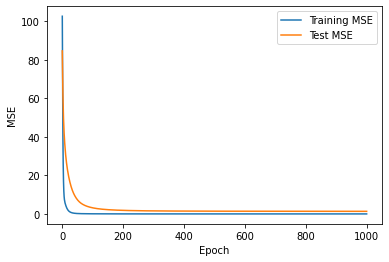

In [43]:
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(X, Y, label="Training MSE")
plt.plot(X, Y_test, label="Test MSE")
plt.legend()
plt.show()

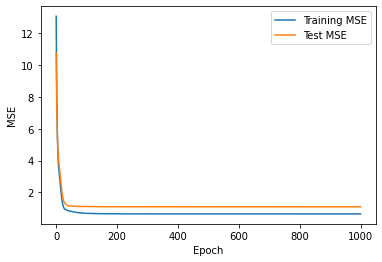

In [40]:
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(X, Y, label="Training MSE")
plt.plot(X, Y_test, label="Test MSE")
plt.legend()
plt.show()